# Visualizaciones Exploratorias

Este notebook se enfoca en las seis visualizaciones requeridas para la Parte I del TP.

In [14]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_DIR = Path('../data/nlp-getting-started')
TRAIN_PATH = DATA_DIR / 'train.csv'
sns.set_theme(style='whitegrid')

In [15]:
train_df = pd.read_csv(TRAIN_PATH)
train_df.head(30)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


## Visualización 1: Distribución del target

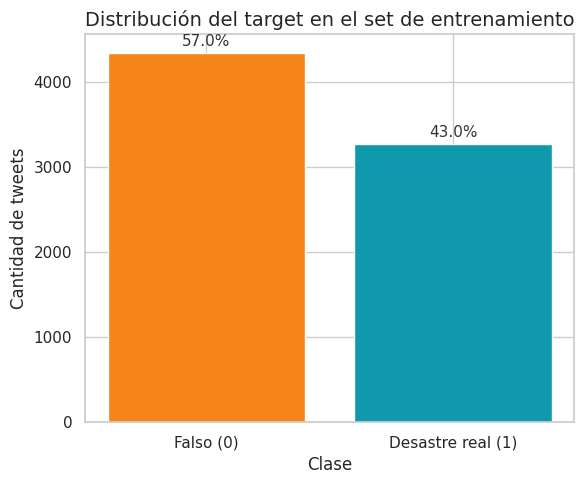

In [16]:
labels_map = {0: 'Falso (0)', 1: 'Desastre real (1)'}
class_counts = train_df['target'].value_counts().sort_index()
class_percentages = class_counts / class_counts.sum() * 100
plot_df = pd.DataFrame(
    {
        'label': [labels_map[idx] for idx in class_counts.index],
        'count': class_counts.values,
        'percentage': class_percentages.values
    }
)

fig, ax = plt.subplots(figsize=(6, 5))
bars = ax.bar(plot_df['label'], plot_df['count'], color=['#f58518', '#1098ad'])
for bar, pct in zip(bars, plot_df['percentage']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 50,
        f"{pct:.1f}%",
        ha='center',
        va='bottom',
        fontsize=11,
        color='#333333'
    )
ax.set_title('Distribución del target en el set de entrenamiento', fontsize=14)
ax.set_ylabel('Cantidad de tweets')
ax.set_xlabel('Clase')
plt.tight_layout()
plt.show()

Okey más o menos igualmente distribuidos los reales de los Falsos. Algunos más falsos que reales.

## Visualización 2: Impacto del conteo de palabras en la clasificación

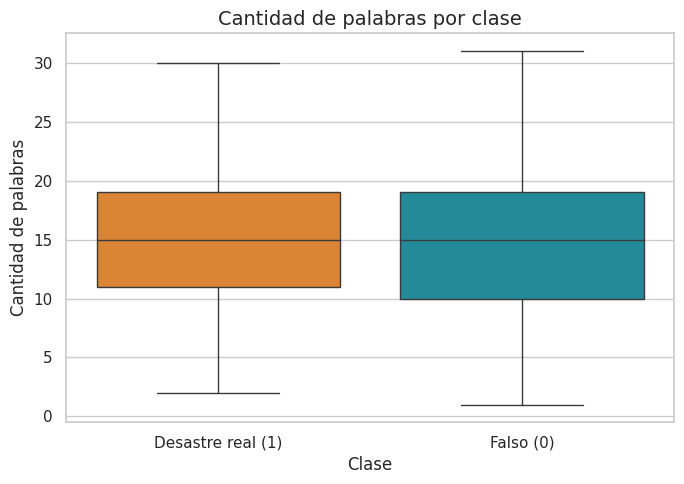

In [17]:
word_counts = train_df['text'].fillna('').str.split().str.len()
plot_df = pd.DataFrame({
    'Clase': train_df['target'].map({0: 'Falso (0)', 1: 'Desastre real (1)'}),
    'Cantidad de palabras': word_counts
})

fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(
    data=plot_df,
    x='Clase',
    y='Cantidad de palabras',
    hue='Clase',
    palette=['#f58518', '#1098ad'],
    ax=ax
)
legend = ax.legend_
if legend is not None:
    legend.remove()
ax.set_title('Cantidad de palabras por clase', fontsize=14)
ax.set_xlabel('Clase')
ax.set_ylabel('Cantidad de palabras')
plt.tight_layout()
plt.show()


Ok, parece que no hay mucha diferencia en la cantidad de palabras entre tweets de desastre y no desastre. Podríamos intentar hacer un análisis más detallado, como ver la distribución de la cantidad de palabras en ambos casos o analizar si hay ciertas palabras clave que aparecen más frecuentemente en tweets de desastre.

## Visualización 3: Ubicación geográfica de los tweets
Voy a graficar la proporción de tweets de desastre por ubicación con alta cobertura para evaluar el contexto geográfico.

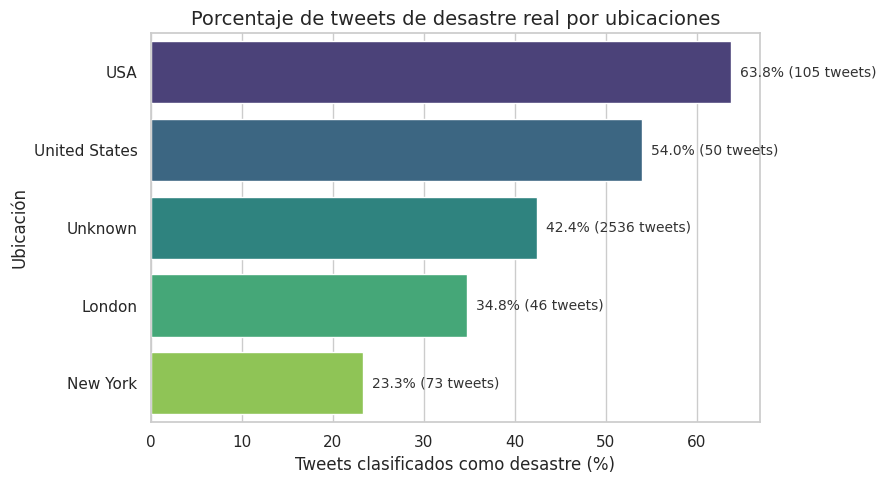

In [18]:
location_clean = train_df['location'].fillna('Unknown').str.strip()
location_counts = location_clean.value_counts()
top_locations = location_counts[location_counts >= 40].head(10).index
plot_df = (
    train_df.assign(location=location_clean)
    .loc[lambda df: df['location'].isin(top_locations)]
    .groupby('location')['target']
    .agg(tweets='size', disaster_rate='mean')
    .sort_values('disaster_rate', ascending=False)
    .reset_index()
)
plot_df['disaster_rate_pct'] = plot_df['disaster_rate'] * 100

fig, ax = plt.subplots(figsize=(9, 5))
sns.barplot(
    data=plot_df,
    x='disaster_rate_pct',
    y='location',
    hue='location',
    palette=sns.color_palette('viridis', len(plot_df)),
    dodge=False,
    ax=ax
)
legend = ax.legend_
if legend is not None:
    legend.remove()
for idx, row in plot_df.iterrows():
    ax.text(
        row['disaster_rate_pct'] + 1,
        idx,
        f"{row['disaster_rate_pct']:.1f}% ({row['tweets']} tweets)",
        va='center',
        fontsize=10,
        color='#333333'
    )
ax.set_title('Porcentaje de tweets de desastre real por ubicaciones', fontsize=14)
ax.set_xlabel('Tweets clasificados como desastre (%)')
ax.set_ylabel('Ubicación')
plt.tight_layout()
plt.show()


In [19]:
location_clean = train_df['location'].fillna('Unknown').str.strip()
all_locations = location_clean.value_counts()

print(f"Total unique locations: {len(all_locations)}")
print(f"\nTop 50 locations by count:")
print("="*60)
for loc, count in all_locations.head(50).items():
    print(f"{loc:40s} : {count:4d} tweets")
    
print(f"\n\nLocations with 'USA' or 'United States' or 'America':")
print("="*60)
usa_related = all_locations[all_locations.index.str.contains('USA|United States|America|U.S', case=False, na=False)]
for loc, count in usa_related.items():
    print(f"{loc:40s} : {count:4d} tweets")

Total unique locations: 3279

Top 50 locations by count:
Unknown                                  : 2536 tweets
USA                                      :  105 tweets
New York                                 :   73 tweets
United States                            :   50 tweets
London                                   :   46 tweets
Nigeria                                  :   32 tweets
Canada                                   :   30 tweets
UK                                       :   27 tweets
Los Angeles, CA                          :   26 tweets
India                                    :   24 tweets
Mumbai                                   :   22 tweets
Washington, DC                           :   21 tweets
California                               :   20 tweets
Kenya                                    :   20 tweets
Chicago, IL                              :   19 tweets
Worldwide                                :   19 tweets
Australia                                :   19 tweets
New York

claro, el campo location está totalmente destruido. Necesito armarme una feature "country".
Usé la API Pública de geocoders para sacar el país de la ubicación dada. Dejo el codigo abajo! 

In [20]:
import json

'''

Usé este script para generar location_to_country.json que me mapea las ubicaciones de los usuarios a países.

from geopy.geocoders import Nominatim
from time import sleep

geolocator = Nominatim(user_agent="tweet-checker")

unique_locations = train_df['location'].dropna().unique()
location_to_country = {}

print(f"Processing {len(unique_locations)} unique locations...")

for i, location in enumerate(unique_locations):
    if pd.isna(location) or location.strip() == '' or location == 'Unknown':
        location_to_country[location] = None
        continue
    
    try:
        result = geolocator.geocode(location, addressdetails=True, timeout=10)
        if result and 'address' in result.raw:
            country = result.raw['address'].get('country')
            location_to_country[location] = country
        else:
            location_to_country[location] = None
    except Exception as e:
        location_to_country[location] = None
    
    if (i + 1) % 50 == 0:
        print(f"Processed {i + 1}/{len(unique_locations)}")
    
    sleep(1)

print(f"Done. Detected {sum(1 for v in location_to_country.values() if v is not None)} countries")

for loc, country in list(location_to_country.items())[:20]:
    print(f"{loc:40s} -> {country}")


with open('../data/location_to_country.json', 'w', encoding='utf-8') as f:
    json.dump(location_to_country, f, ensure_ascii=False, indent=2)

'''

with open('../data/location_to_country.json', 'r', encoding='utf-8') as f:
  location_to_country = json.load(f)

In [21]:
train_df['country'] = train_df['location'].map(location_to_country)

print(f"Rows with country: {train_df['country'].notna().sum()}")
print(f"Rows without country: {train_df['country'].isna().sum()}")

print("\nTop countries:")
print(train_df['country'].value_counts().head(15))

train_df[train_df['country'].notna()][['location', 'country', 'text']].head(10)

Rows with country: 4060
Rows without country: 3553

Top countries:
country
United States of America    2153
United Kingdom               438
Canada                       222
Australia                    150
India                        138
Nigeria                       76
Philippines                   45
Kenya                         40
South Africa                  37
France                        37
Indonesia                     33
Brasil                        30
پاکستان                       26
Deutschland                   26
Éire / Ireland                26
Name: count, dtype: int64


,location,country,text
31,Birmingham,United Kingdom,@bbcmtd Wholesale Markets ablaze http://t.co/l...
34,"Philadelphia, PA",United States of America,Crying out for more! Set me ablaze
35,"London, UK",United Kingdom,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
36,Pretoria,South Africa,@PhDSquares #mufc they've built so much hype a...
37,World Wide!!,United States of America,INEC Office in Abia Set Ablaze - http://t.co/3...
39,Paranaque City,Philippines,Ablaze for you Lord :D
42,milky way,Sesel,Had an awesome time visiting the CFC head offi...
46,"GREENSBORO,NORTH CAROLINA",United States of America,How the West was burned: Thousands of wildfire...
49,England.,United Kingdom,First night with retainers in. It's quite weir...
50,"Sheffield Township, Ohio",United States of America,Deputies: Man shot before Brighton home set ab...


Me cierra. El que ni idea es milky way pero no había mucha esperanza para esa. 

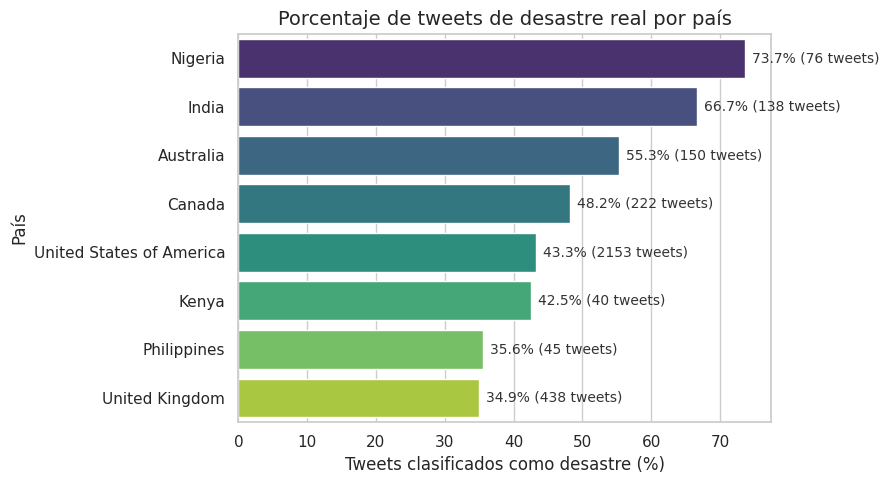

In [22]:
country_counts = train_df['country'].value_counts()
top_countries = country_counts[country_counts >= 40].head(10).index

plot_df = (
    train_df[train_df['country'].isin(top_countries)]
    .groupby('country')['target']
    .agg(tweets='size', disaster_rate='mean')
    .sort_values('disaster_rate', ascending=False)
    .reset_index()
)
plot_df['disaster_rate_pct'] = plot_df['disaster_rate'] * 100

fig, ax = plt.subplots(figsize=(9, 5))
sns.barplot(
    data=plot_df,
    x='disaster_rate_pct',
    y='country',
    hue='country',
    palette=sns.color_palette('viridis', len(plot_df)),
    dodge=False,
    ax=ax
)
legend = ax.legend_
if legend is not None:
    legend.remove()
for idx, row in plot_df.iterrows():
    ax.text(
        row['disaster_rate_pct'] + 1,
        idx,
        f"{row['disaster_rate_pct']:.1f}% ({row['tweets']} tweets)",
        va='center',
        fontsize=10,
        color='#333333'
    )
ax.set_title('Porcentaje de tweets de desastre real por país', fontsize=14)
ax.set_xlabel('Tweets clasificados como desastre (%)')
ax.set_ylabel('País')
plt.tight_layout()
plt.show()

Okey!! Vemos data bastante más util ahora, la normalización por país diferenció bastante más! Aunque claro, se mencionó bastante en una clase de la materia, que ante menos población, la variabilidad es mucho mayor. Aun así, me encantaron los resultados, me quedo fuerte con esta feature.

## Visualización 4: Longitud de texto vs target

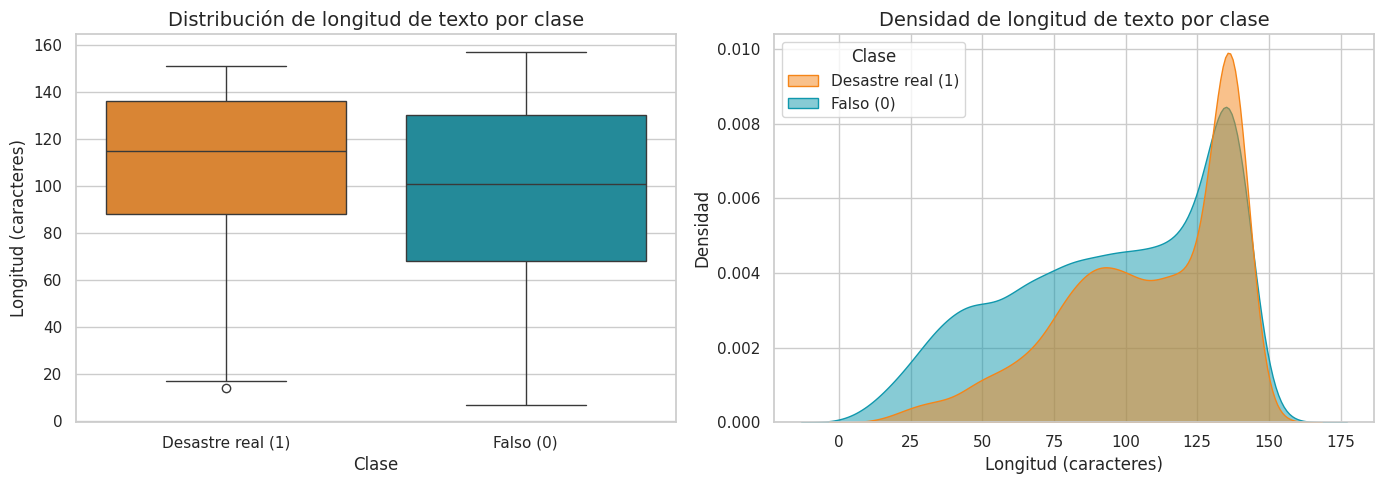

In [23]:
text_lengths = train_df['text'].fillna('').str.len()
plot_df = pd.DataFrame({
    'Clase': train_df['target'].map({0: 'Falso (0)', 1: 'Desastre real (1)'}),
    'Longitud de texto (caracteres)': text_lengths
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(
    data=plot_df,
    x='Clase',
    y='Longitud de texto (caracteres)',
    hue='Clase',
    palette=['#f58518', '#1098ad'],
    ax=ax1
)
legend = ax1.legend_
if legend is not None:
    legend.remove()
ax1.set_title('Distribución de longitud de texto por clase', fontsize=14)
ax1.set_xlabel('Clase')
ax1.set_ylabel('Longitud (caracteres)')

sns.kdeplot(
    data=plot_df,
    x='Longitud de texto (caracteres)',
    hue='Clase',
    fill=True,
    palette=['#f58518', '#1098ad'],
    alpha=0.5,
    ax=ax2
)
ax2.set_title('Densidad de longitud de texto por clase', fontsize=14)
ax2.set_xlabel('Longitud (caracteres)')
ax2.set_ylabel('Densidad')

plt.tight_layout()
plt.show()

okey! Sorprendentemente los tweets falsos tienen menos texto que los otros. inesperado pero bueno. 

## Visualización 5: Entidades y símbolos
Resaltar cómo la presencia de URLs, hashtags o mentions se relaciona con el target.

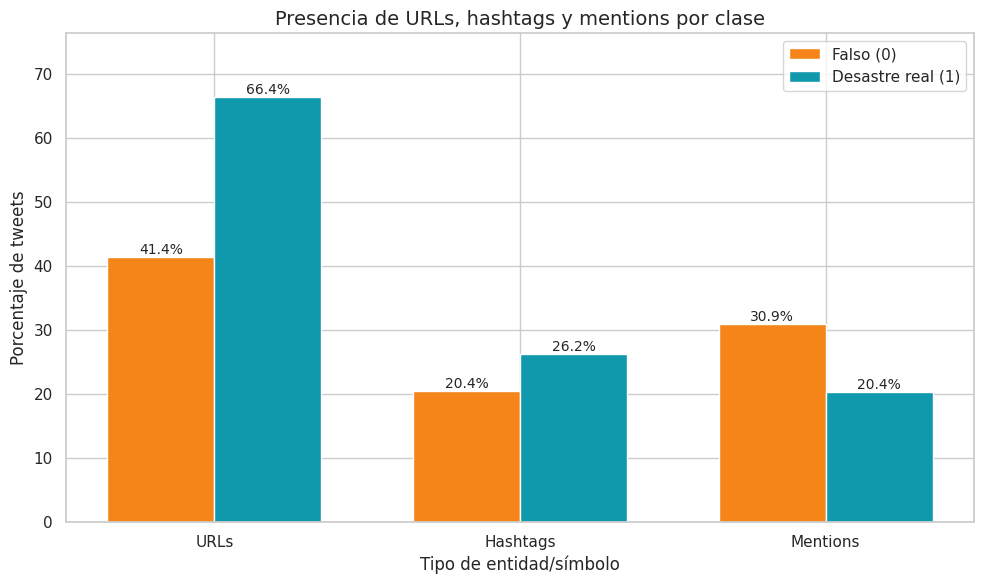

In [24]:
train_df['has_url'] = train_df['text'].fillna('').str.contains(r'http[s]?://', regex=True)
train_df['has_hashtag'] = train_df['text'].fillna('').str.contains(r'#\w+', regex=True)
train_df['has_mention'] = train_df['text'].fillna('').str.contains(r'@\w+', regex=True)

features = ['has_url', 'has_hashtag', 'has_mention']
feature_names = ['URLs', 'Hashtags', 'Mentions']

stats = []
for target_val in [0, 1]:
    for feature, name in zip(features, feature_names):
        pct = train_df[train_df['target'] == target_val][feature].mean() * 100
        stats.append({
            'Clase': 'Falso (0)' if target_val == 0 else 'Desastre real (1)',
            'Feature': name,
            'Porcentaje': pct
        })

plot_df = pd.DataFrame(stats)

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(feature_names))
width = 0.35

false_data = plot_df[plot_df['Clase'] == 'Falso (0)']['Porcentaje'].values
disaster_data = plot_df[plot_df['Clase'] == 'Desastre real (1)']['Porcentaje'].values

bars1 = ax.bar(x - width/2, false_data, width, label='Falso (0)', color='#f58518')
bars2 = ax.bar(x + width/2, disaster_data, width, label='Desastre real (1)', color='#1098ad')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Tipo de entidad/símbolo')
ax.set_ylabel('Porcentaje de tweets')
ax.set_title('Presencia de URLs, hashtags y mentions por clase', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(feature_names)
ax.legend()
ax.set_ylim(0, max(plot_df['Porcentaje']) * 1.15)

plt.tight_layout()
plt.show()

Bueno, por lo menos hay una correspondencia entre simbolos y tweets de desastre. Nuevamente pensé que sería al revés la relación, pero lo tomo. Parece que el más determinante es si tiene o no URL.

## Visualización 6: Nube de palabras - Palabras asociadas con desastres
Nube de palabras mostrando las palabras más frecuentes (mín 5 tweets). Tamaño = frecuencia, Color = tasa de desastre.

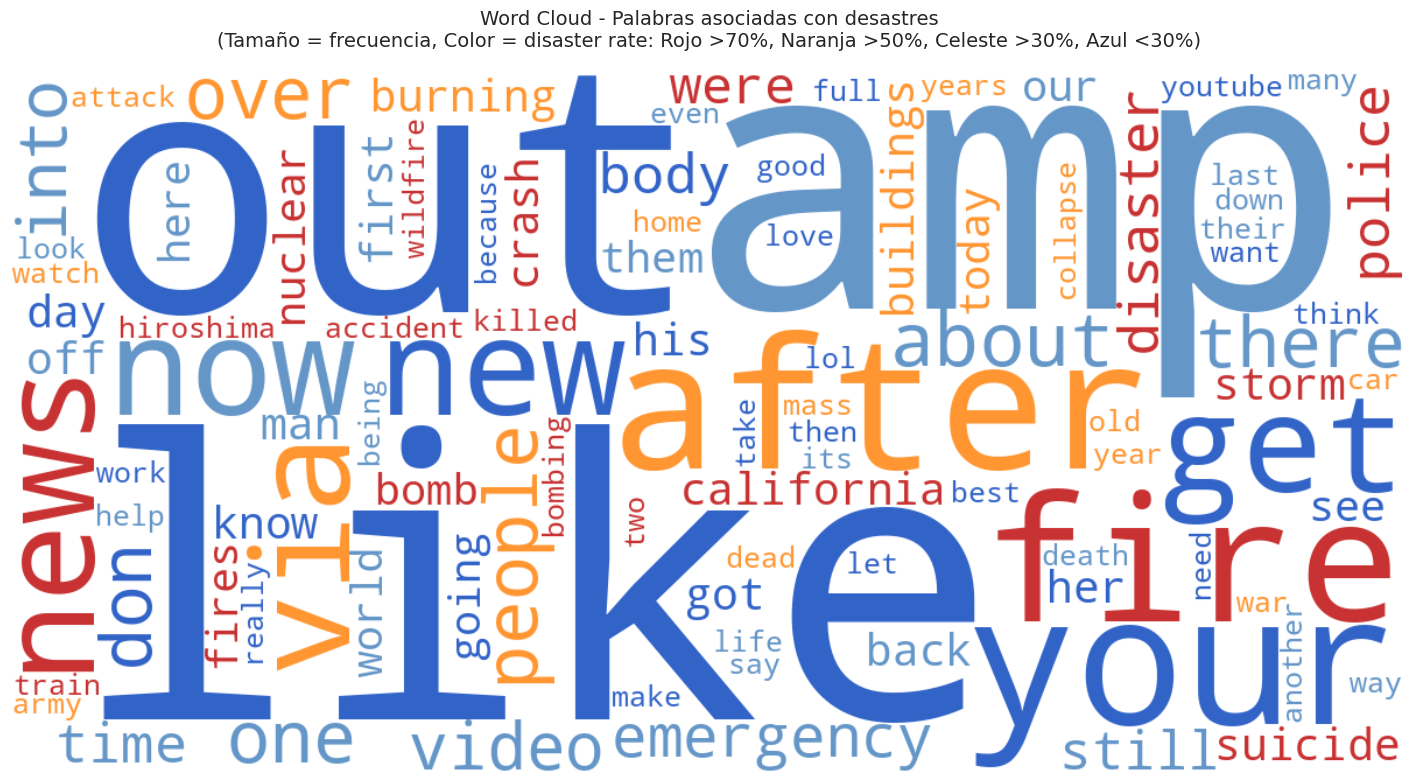


Top 20 palabras por disaster rate (min 5 tweets):
               word  count  disaster_rate
843        northern     64            1.0
407          debris     49            1.0
1987         severe     44            1.0
1763     derailment     40            1.0
2044   legionnaires     39            1.0
2093       migrants     37            1.0
2348  investigators     37            1.0
926          mosque     33            1.0
2542      detonated     31            1.0
1577            pkk     31            1.0
1556         turkey     27            1.0
949         israeli     27            1.0
483      helicopter     25            1.0
2565   conclusively     25            1.0
2196         saipan     25            1.0
2356      projected     24            1.0
2051          signs     23            1.0
2384         trench     23            1.0
2484        refugio     22            1.0
2486       costlier     22            1.0


In [25]:
from wordcloud import WordCloud
import re
from collections import Counter

# Filtro un par de palabras que no me interesa ver distribuciones: (igual me quedé cortísimo)
stop_words = set(['the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 
                  'of', 'with', 'by', 'from', 'as', 'is', 'was', 'are', 'been', 'be',
                  'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'should',
                  'could', 'may', 'might', 'must', 'can', 'this', 'that', 'these', 'those',
                  'i', 'you', 'he', 'she', 'it', 'we', 'they', 'what', 'which', 'who',
                  'when', 'where', 'why', 'how', 'all', 'each', 'every', 'both', 'few',
                  'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only',
                  'own', 'same', 'so', 'than', 'too', 'very', 'just', 'https', 'http',
                  'co', 't', 's', 'm', 're', 've', 'll', 'd'])

word_stats = {}
for idx, row in train_df.iterrows():
    text = str(row['text']).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    words = text.split()
    words = [w for w in words if w not in stop_words and len(w) > 2]
    
    for word in set(words):
        if word not in word_stats:
            word_stats[word] = {'count': 0, 'disaster_count': 0}
        word_stats[word]['count'] += 1
        word_stats[word]['disaster_count'] += row['target']

word_data = []
for word, stats in word_stats.items():
    if stats['count'] >= 5:
        disaster_rate = stats['disaster_count'] / stats['count']
        word_data.append({
            'word': word,
            'count': stats['count'],
            'disaster_rate': disaster_rate
        })

word_df = pd.DataFrame(word_data).sort_values('count', ascending=False)

frequencies = {row['word']: row['count'] for _, row in word_df.iterrows()}
disaster_rates = {row['word']: row['disaster_rate'] for _, row in word_df.iterrows()}

def color_func(word, **kwargs):
    rate = disaster_rates.get(word, 0.5)
    if rate > 0.7:
        return 'rgb(200, 50, 50)'
    elif rate > 0.5:
        return 'rgb(255, 150, 50)'
    elif rate > 0.3:
        return 'rgb(100, 150, 200)'
    else:
        return 'rgb(50, 100, 200)'

wc = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    max_words=100,
    relative_scaling=0.5,
    min_font_size=10
).generate_from_frequencies(frequencies)

fig, ax = plt.subplots(figsize=(16, 8))
ax.imshow(wc.recolor(color_func=color_func), interpolation='bilinear')
ax.axis('off')
ax.set_title('Word Cloud - Palabras asociadas con desastres\n(Tamaño = frecuencia, Color = disaster rate: Rojo >70%, Naranja >50%, Celeste >30%, Azul <30%)', 
             fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print(f"\nTop 20 palabras por disaster rate (min 5 tweets):")
print(word_df.nlargest(20, 'disaster_rate')[['word', 'count', 'disaster_rate']])

Okey hay palabras que claramente se asocian más a desastres, como "news", "fire", "accident", etc. Mientras que otras como "like", "get", "your" se asocian más a tweets no relacionados con desastres. Igual son palabras bastante generales. filtré algunas con stop words pero en general no hay nada muy específico a los no desastres, pero bueno, si estás tweeteando un desastre probablemente no digas "like" o "your". Debido a la seriedad del tema.

## Visualización 7: Análisis de sentimiento del texto del tweet

/tmp/ipykernel_76021/4106497693.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_df = train_df.groupby(['sentiment_bin', 'target']).size().unstack(fill_value=0)


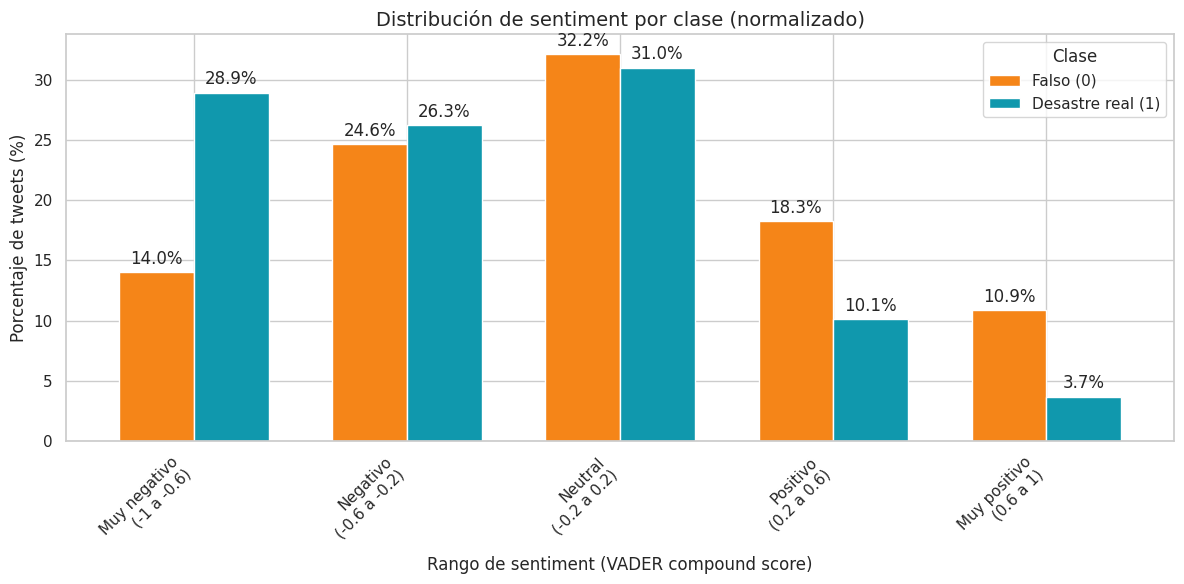


Estadísticas de sentiment por clase:
         count      mean       std     min     25%     50%     75%     max
target                                                                    
0       4342.0 -0.052444  0.465568 -0.9883 -0.4588  0.0000  0.3182  0.9730
1       3271.0 -0.267240  0.434629 -0.9686 -0.6390 -0.3182  0.0000  0.9471


In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_compound(text):
    if pd.isna(text) or text.strip() == '':
        return 0.0
    return analyzer.polarity_scores(text)['compound']

train_df['sentiment'] = train_df['text'].apply(get_sentiment_compound)

bins = [-1, -0.6, -0.2, 0.2, 0.6, 1]
labels = ['Muy negativo\n(-1 a -0.6)', 'Negativo\n(-0.6 a -0.2)', 'Neutral\n(-0.2 a 0.2)', 
          'Positivo\n(0.2 a 0.6)', 'Muy positivo\n(0.6 a 1)']
train_df['sentiment_bin'] = pd.cut(train_df['sentiment'], bins=bins, labels=labels, include_lowest=True)

plot_df = train_df.groupby(['sentiment_bin', 'target']).size().unstack(fill_value=0)

plot_df_pct = plot_df.div(plot_df.sum(axis=0), axis=1) * 100
plot_df_pct.columns = ['Falso (0)', 'Desastre real (1)']

fig, ax = plt.subplots(figsize=(12, 6))
plot_df_pct.plot(kind='bar', ax=ax, color=['#f58518', '#1098ad'], width=0.7)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

ax.set_title('Distribución de sentiment por clase (normalizado)', fontsize=14)
ax.set_xlabel('Rango de sentiment (VADER compound score)')
ax.set_ylabel('Porcentaje de tweets (%)')
ax.legend(title='Clase', loc='upper right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nEstadísticas de sentiment por clase:")
print(train_df.groupby('target')['sentiment'].describe())

Okey!!! Me gustó este, realmente parece haber correlación entre el sentimiento del tweet y si es desastre o no. Sobretodo se ve muy fuerte en las puntas. Los tweets de desastre tienden a tener sentimientos más negativos, mientras que los no desastres son más neutrales o positivos. Tiene mucho sentido así que voy a re usar la feature de sentimiento en el modelo.